# k-means 군집

In [4]:
install.packages("caret")

also installing the dependencies 'numDeriv', 'SQUAREM', 'colorspace', 'utf8', 'KernSmooth', 'lava', 'backports', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'lifecycle', 'cli', 'fansi', 'pillar', 'pkgconfig', 'stringi', 'assertthat', 'BH', 'plogr', 'rpart', 'survival', 'nnet', 'class', 'prodlim', 'ellipsis', 'vctrs', 'gtable', 'lazyeval', 'MASS', 'mgcv', 'scales', 'tibble', 'viridisLite', 'codetools', 'iterators', 'data.table', 'stringr', 'dplyr', 'gower', 'ipred', 'lubridate', 'tidyr', 'timeDate', 'ggplot2', 'foreach', 'plyr', 'ModelMetrics', 'nlme', 'reshape2', 'recipes', 'withr'



package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'KernSmooth' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'backports' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'stringi' s

In [14]:
library(caret)
data(iris)
set.seed(123)
inTrain <- createDataPartition(y=iris$Species, p=0.7, list=FALSE)

training <- iris[inTrain,]
testing <- iris[-inTrain,]

In [15]:
training.data <- scale(training[-5])
summary(training.data)

  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.83116   Min.   :-2.5490   Min.   :-1.5066   Min.   :-1.4250  
 1st Qu.:-0.88923   1st Qu.:-0.5918   1st Qu.:-1.2250   1st Qu.:-1.1654  
 Median :-0.06504   Median :-0.1025   Median : 0.2955   Median : 0.1322  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.64141   3rd Qu.: 0.6314   3rd Qu.: 0.7461   3rd Qu.: 0.7811  
 Max.   : 2.40753   Max.   : 2.5886   Max.   : 1.7598   Max.   : 1.6894  

In [6]:
normalize = function(x){
    return((x-min(x)) / diff(range(x)))
}

In [7]:
training.norm.data <- normalize(training[-5])
summary(training.norm.data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2431  0.4167  0.4343  0.5903  1.0000 

In [24]:
install.packages("NbClust")

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JMLee\AppData\Local\Temp\RtmpCsVTgQ\downloaded_packages


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


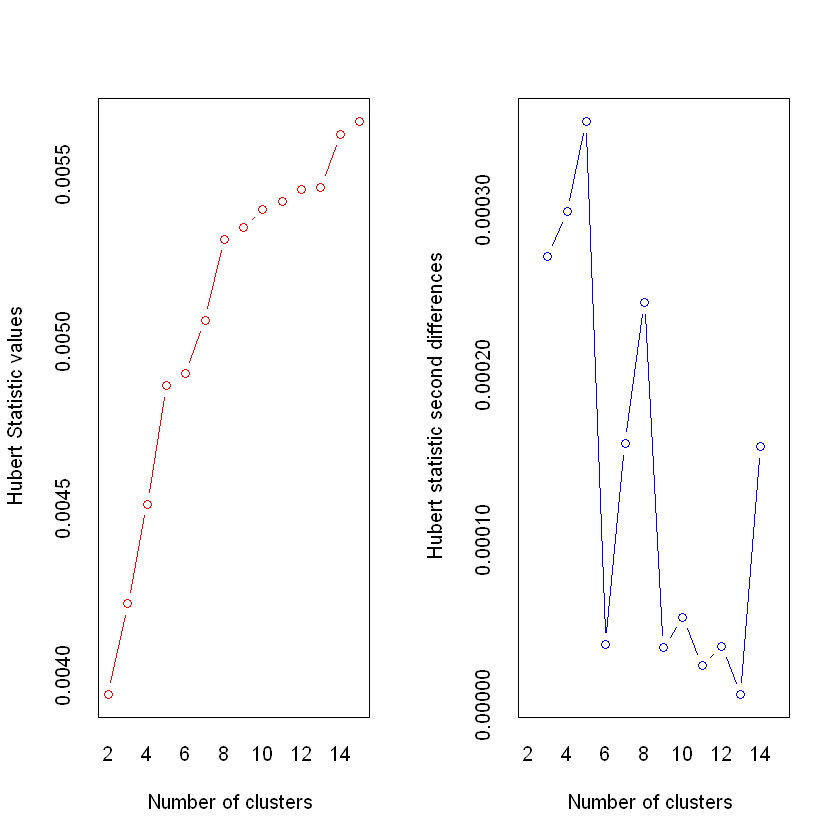

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 4 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


Warning message in par(mflow = c(1, 1)):
""mflow"는 그래픽 매개변수가 아닙니다"

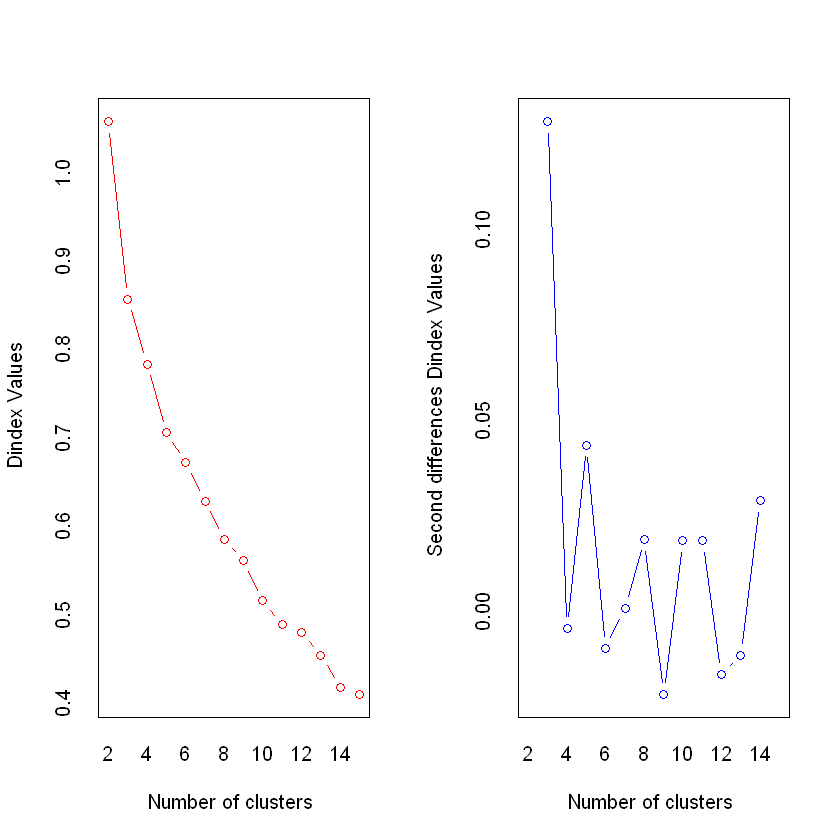

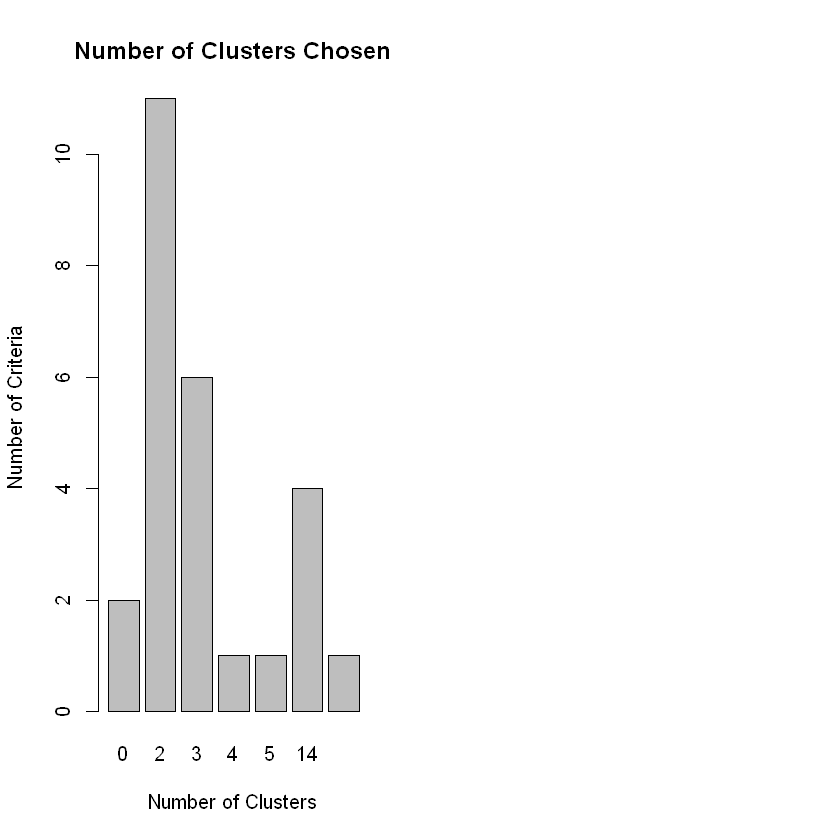

In [13]:
library(NbClust)
nc <- NbClust(training.data, min.nc=2, max.nc=15, method="kmeans")
par(mflow=c(1,1))
barplot(table(nc$Best.n[1,]),
        xlab="Number of Clusters", ylab="Number of Criteria", main="Number of Clusters Chosen")